In [1]:
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset
import numpy as np

# from matplotlib.mlab import bivariate_normal

import cartopy.crs as ccrs
import xarray as xr

import math

import matplotlib.pyplot as plt
import cartopy.crs as crs
import cartopy.feature as cfeature
import matplotlib.colors as colors
from matplotlib.cm import get_cmap
from matplotlib import ticker
import matplotlib.gridspec as gridspec
from matplotlib.ticker import EngFormatter, StrMethodFormatter

from cartopy import config
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.util import add_cyclic_point

from IPython.display import Image

from tqdm import tqdm
import os 

In [2]:
Years = ["2000","2001","2002","2003","2004","2005","2006","2007","2008","2009"]

Months = []
for imon in range(1,13): ### shw
    Months.append(str(imon).zfill(2))
    
Days = []
for iday in range(1,30,3):
    Days.append(str(iday).zfill(2))
    
print(Years)
print(Months)
print(Days)

['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009']
['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
['01', '04', '07', '10', '13', '16', '19', '22', '25', '28']


In [3]:
# Nx = 36
# Ny = 21
# Nz = 5
# N_parcel = 3780

Nx = 24
Ny = 21
Nz = 6+1
N_parcel = Nx*Ny*Nz
# if Nx*Ny*Nz!=N_parcel: print('ERROR: parcel number is wrong!')
    
N_year  = len(Years)
N_month = len(Months)
N_day   = len(Days)

lifetime   = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
lifetime_N = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
lifetime_S = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
LON = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
LAT = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))

print(lifetime.shape)


Nz1 = 6
lifetime1   = np.zeros((Nz1, Ny, Nx, N_day, N_month, N_year))
lifetime1_N = np.zeros((Nz1, Ny, Nx, N_day, N_month, N_year))
lifetime1_S = np.zeros((Nz1, Ny, Nx, N_day, N_month, N_year))
LON1 = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
LAT1 = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))


Nz2 = 1
lifetime2   = np.zeros((Nz2, Ny, Nx, N_day, N_month, N_year))
lifetime2_N = np.zeros((Nz2, Ny, Nx, N_day, N_month, N_year))
lifetime2_S = np.zeros((Nz2, Ny, Nx, N_day, N_month, N_year))
LON2 = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
LAT2 = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))

if Nz!=(Nz1+Nz2): print("Error: Nz=Nz1+Nz2!!!")  

(7, 21, 24, 10, 12, 10)


In [4]:
Pressure = [100, 75, 65, 55, 47, 40, 30] # hPa
Height   = [16,  17.92, 18.87, 20, 21.05, 22.1, 24] # km

In [5]:
# for first 6 altitude injections

directory1 = '../Lifetime/'
filename1 = "Lifetime_"+Years[0]+Months[0]+Days[0]+".txt"
print(directory1+filename1)

for i_year in range(N_year):
    for i_month in tqdm(range(N_month)):
        for i_day in range(N_day):
            filename1 = "Lifetime_"+Years[i_year]+Months[i_month]+Days[i_day]+".txt"
            File1 = open(directory1+filename1, 'r')
        
            Lines1 = File1.readlines()

            # Strips the newline character
            data = []
            data_N = []
            data_S = []
            Longitude = []
            Latitude = []
            for line1 in Lines1:
                a1 = line1.split(',')
                data.append(float(a1[0]))
                data_N.append(float(a1[1]))
                data_S.append(float(a1[2]))
                Longitude.append(float(a1[3]))
                Latitude.append(float(a1[4]))
    
    
            i = 0
            for ix in range(Nx):
                for iy in range(Ny):
                    for iz in range(Nz1):
                        lifetime1[iz,iy,ix,i_day,i_month,i_year] = data[i]
                        lifetime1_N[iz,iy,ix,i_day,i_month,i_year] = data_N[i]
                        lifetime1_S[iz,iy,ix,i_day,i_month,i_year] = data_S[i]
                        
                        LON1[iz,iy,ix,i_day,i_month,i_year] = Longitude[i]
                        LAT1[iz,iy,ix,i_day,i_month,i_year] = Latitude[i]
                        
                        i = i+1

  0%|          | 0/12 [00:00<?, ?it/s]

../Lifetime/Lifetime_20000101.txt


100%|██████████| 12/12 [00:02<00:00,  5.40it/s]


In [6]:
# for 21-km injection

directory2 = '../21km_post_process/Lifetime_21km/'
filename2 = "Lifetime_"+Years[0]+Months[0]+Days[0]+"_21km.txt"
print(directory2+filename2)

for i_year in range(N_year):
    for i_month in tqdm(range(N_month)):
        for i_day in range(N_day):
            filename2 = "Lifetime_"+Years[i_year]+Months[i_month]+Days[i_day]+"_21km.txt"
            File2 = open(directory2+filename2, 'r')
        
            Lines2 = File2.readlines()

            # Strips the newline character
            data = []
            data_N = []
            data_S = []
            Longitude = []
            Latitude = []
            for line2 in Lines2:
                a2 = line2.split(',')
                data.append(     float(a2[0]))
                data_N.append(   float(a2[1]))
                data_S.append(   float(a2[2]))
                Longitude.append(float(a2[3]))
                Latitude.append( float(a2[4]))
    
    
            i = 0
            for ix in range(Nx):
                for iy in range(Ny):
                    for iz in range(Nz2):
                        lifetime2[iz,iy,ix,i_day,i_month,i_year] = data[i]
                        lifetime2_N[iz,iy,ix,i_day,i_month,i_year] = data_N[i]
                        lifetime2_S[iz,iy,ix,i_day,i_month,i_year] = data_S[i]
                        
                        LON2[iz,iy,ix,i_day,i_month,i_year] = Longitude[i]
                        LAT2[iz,iy,ix,i_day,i_month,i_year] = Latitude[i]
                        
                        i = i+1

 17%|█▋        | 2/12 [00:00<00:00, 12.61it/s]

../21km_post_process/Lifetime_21km/Lifetime_20000101_21km.txt


100%|██████████| 12/12 [00:00<00:00, 13.76it/s]


In [7]:
# Combine (1) 6 altitude injections and (2) 21-km injection

# Pressure = [100, 75, 65, 55, 47, 40, 30] # hPa
# Height   = [16,  18, 19, 20, 21, 22, 24] # km

lifetime[0:4,:,:,:,:,:]   = lifetime1[0:4,:,:,:,:,:]
lifetime_N[0:4,:,:,:,:,:] = lifetime1_N[0:4,:,:,:,:,:]
lifetime_S[0:4,:,:,:,:,:] = lifetime1_S[0:4,:,:,:,:,:]
LON[0:4,:,:,:,:,:] = LON1[0:4,:,:,:,:,:]
LAT[0:4,:,:,:,:,:] = LAT1[0:4,:,:,:,:,:]

# 21-km
lifetime[4,:,:,:,:,:]   = lifetime2[0,:,:,:,:,:]
lifetime_N[4,:,:,:,:,:] = lifetime2_N[0,:,:,:,:,:]
lifetime_S[4,:,:,:,:,:] = lifetime2_S[0,:,:,:,:,:]
LON[4,:,:,:,:,:] = LON2[0,:,:,:,:,:]
LAT[4,:,:,:,:,:] = LAT2[0,:,:,:,:,:]


lifetime[5:7,:,:,:,:,:]   = lifetime1[4:6,:,:,:,:,:]
lifetime_N[5:7,:,:,:,:,:] = lifetime1_N[4:6,:,:,:,:,:]
lifetime_S[5:7,:,:,:,:,:] = lifetime1_S[4:6,:,:,:,:,:]
LON[5:7,:,:,:,:,:] = LON1[4:6,:,:,:,:,:]
LAT[5:7,:,:,:,:,:] = LAT1[4:6,:,:,:,:,:]


In [8]:
# create seasonal data

N_season = 4

lifetime_season = np.zeros((Nz, Ny, Nx, N_season, N_year))
lifetime_N_season = np.zeros((Nz, Ny, Nx, N_season, N_year))
lifetime_S_season = np.zeros((Nz, Ny, Nx, N_season, N_year))

# for Winter
lifetime_season[:,:,:,0,:] = np.mean(lifetime[:,:,:,:,[0,1,11],:], axis=(3,4))
lifetime_N_season[:,:,:,0,:] = np.mean(lifetime_N[:,:,:,:,[0,1,11],:], axis=(3,4))
lifetime_S_season[:,:,:,0,:] = np.mean(lifetime_S[:,:,:,:,[0,1,11],:], axis=(3,4))

# for Spring, Summer and Autumn
for i in range(1,N_season):
    print(i,i*3-1,(i+1)*3-1)
    lifetime_season[:,:,:,i,:]   = np.mean( lifetime[:,:,:,:,i*3-1:(i+1)*3-1,:], axis=(3,4))
    lifetime_N_season[:,:,:,i,:] = np.mean( lifetime_N[:,:,:,:,i*3-1:(i+1)*3-1,:], axis=(3,4))
    lifetime_S_season[:,:,:,i,:] = np.mean( lifetime_S[:,:,:,:,i*3-1:(i+1)*3-1,:], axis=(3,4))


lifetime_season_mean   = np.zeros((Nz, Ny, Nx, N_season))
lifetime_N_season_mean = np.zeros((Nz, Ny, Nx, N_season))
lifetime_S_season_mean = np.zeros((Nz, Ny, Nx, N_season))

for i in range(0,N_season):
    lifetime_season_mean[:,:,:,i] = np.mean(lifetime_season[:,:,:,i,:], axis=3)
    lifetime_N_season_mean[:,:,:,i] = np.mean(lifetime_N_season[:,:,:,i,:], axis=3)
    lifetime_S_season_mean[:,:,:,i] = np.mean(lifetime_S_season[:,:,:,i,:], axis=3)




1 2 5
2 5 8
3 8 11


### Change the Lon and Lat order, and change the lifetime data order in corresponding to the Lon/Lat order

In [9]:
LON[0,0,:,0,0,0]

array([  0.,  15.,  30.,  45.,  60.,  75.,  90., 105., 120., 135., 150.,
       165., 180., 195., 210., 225., 240., 255., 270., 285., 300., 315.,
       330., 345.])

In [10]:
LON_1d = LON[0,0,:,0,0,0]
LAT_1d = LAT[0,:,0,0,0,0]

# First for LON: change (0,360) to (-180,180)

#################
# correst method 1:
#################
lifetime_season_mean_new = np.zeros((Nz, Ny, Nx, N_season))
lifetime_N_season_mean_new = np.zeros((Nz, Ny, Nx, N_season))
lifetime_S_season_mean_new = np.zeros((Nz, Ny, Nx, N_season))

print("LON Before: ", LON_1d)

for i in range(len(LON_1d)):
    if LON_1d[i]>=180: LON_1d[i] = LON_1d[i]-360

# sort
idx = np.argsort(LON_1d)
# print(idx)

LON_1d = LON_1d[idx]
lifetime_season_mean_new = lifetime_season_mean[:,:,idx,:]
lifetime_N_season_mean_new = lifetime_N_season_mean[:,:,idx,:]
lifetime_S_season_mean_new = lifetime_S_season_mean[:,:,idx,:]

print("LON After: ", LON_1d)

print("")
print(lifetime_season_mean_new.shape)


#################
# wrong method 2:
#################

# lifetime_season_mean_new = np.zeros((Nz, Ny, Nx, N_season))
# lifetime_N_season_mean_new = np.zeros((Nz, Ny, Nx, N_season))
# lifetime_S_season_mean_new = np.zeros((Nz, Ny, Nx, N_season))

# LON_1d = LON_1d - 180
# lifetime_season_mean_new = lifetime_season_mean[:,:,:,:]
# lifetime_N_season_mean_new = lifetime_N_season_mean[:,:,:,:]
# lifetime_S_season_mean_new = lifetime_S_season_mean[:,:,:,:]

LON Before:  [  0.  15.  30.  45.  60.  75.  90. 105. 120. 135. 150. 165. 180. 195.
 210. 225. 240. 255. 270. 285. 300. 315. 330. 345.]
LON After:  [-180. -165. -150. -135. -120. -105.  -90.  -75.  -60.  -45.  -30.  -15.
    0.   15.   30.   45.   60.   75.   90.  105.  120.  135.  150.  165.]

(7, 21, 24, 4)


In [11]:
# Second for LAT: change (-20,20) to (20,-20)

lifetime_season_mean_new2 = np.zeros((Nz, Ny, Nx, N_season))
lifetime_N_season_mean_new2 = np.zeros((Nz, Ny, Nx, N_season))
lifetime_S_season_mean_new2 = np.zeros((Nz, Ny, Nx, N_season))


print("LAT Before: ", LAT_1d)
LAT_1d = LAT_1d[::-1]
print("LAT After: ", LAT_1d)


lifetime_season_mean_new2 = lifetime_season_mean_new[:,::-1,:,:]
lifetime_N_season_mean_new2 = lifetime_N_season_mean_new[:,::-1,:,:]
lifetime_S_season_mean_new2 = lifetime_S_season_mean_new[:,::-1,:,:]

print("")
print(lifetime_season_mean_new.shape)

LAT Before:  [-30. -27. -24. -21. -18. -15. -12.  -9.  -6.  -3.   0.   3.   6.   9.
  12.  15.  18.  21.  24.  27.  30.]
LAT After:  [ 30.  27.  24.  21.  18.  15.  12.   9.   6.   3.   0.  -3.  -6.  -9.
 -12. -15. -18. -21. -24. -27. -30.]

(7, 21, 24, 4)


# *** important check ***

(1) The lat dimension should start from 20 and end at -20 for the input data in the following plotting code!!!

(2) The lon dimension should start from -180 and end at 180 for the input data in the following plotting code!!!


### calcualte the mean lifetime of selected regions in 18 km winter

In [12]:
ilon11 = 16
ilon12 = 20
LON_1d[ilon11:ilon12]

array([ 60.,  75.,  90., 105.])

In [13]:
ilon21 = 4
ilon22 = 8
LON_1d[ilon21:ilon22]

array([-120., -105.,  -90.,  -75.])

In [14]:
ilat1 = 7
ilat2 = 14
LAT_1d[ilat1:ilat2]

array([ 9.,  6.,  3.,  0., -3., -6., -9.])

In [15]:
#[1=18km, lat, lon, 0=winter]

Box_blue = np.mean(lifetime_season_mean_new2[1,ilat1:ilat2,ilon11:ilon12,0], axis=(0,1)) /365.25

Box_red = np.mean(lifetime_season_mean_new2[1,ilat1:ilat2,ilon21:ilon22,0], axis=(0,1)) /365.25

print(Box_red, Box_blue, (Box_red-Box_blue)/Box_blue)

print(f"Even in the same injection lat and altitude (18 km), \
particle lifetime from the red box can be more than 20% larger than that from blue box ")

1.1094534076464262 1.3820853296828657 -0.1972612806034182
Even in the same injection lat and altitude (18 km), particle lifetime from the red box can be more than 20% larger than that from blue box 


## The following figure is the final figure for the manuscript

In [16]:
import string
alphabet = list(string.ascii_lowercase)
print(alphabet)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


24


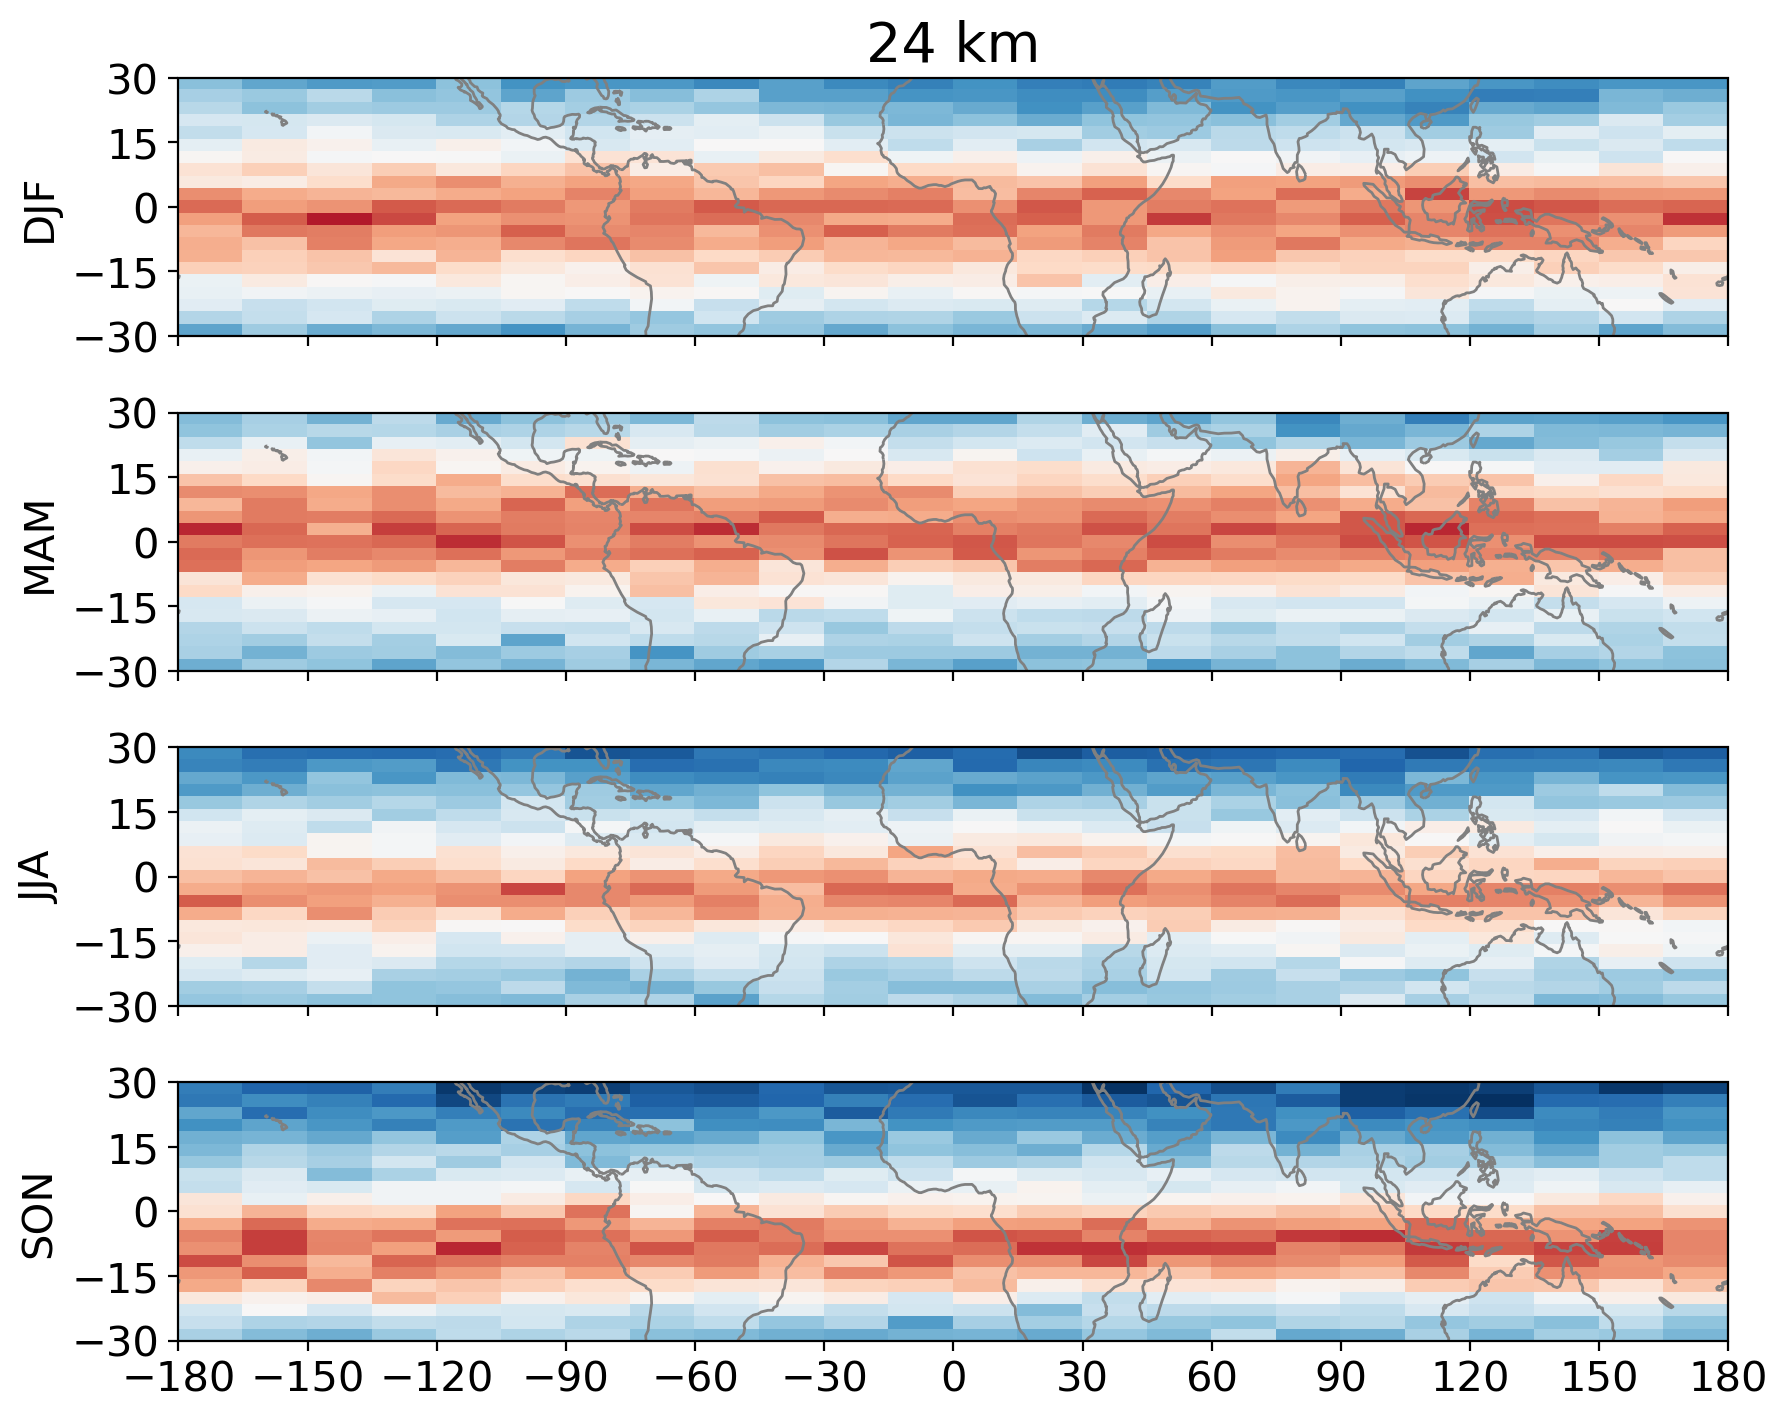

In [35]:
iz=6
print(Height[iz])

fig = plt.figure(figsize=(10,8.5), dpi=200)
projection = crs.PlateCarree()

if iz==0:
    Day_min = 50/365.25
    Day_max = 300/365.25 
if iz==1:
    Day_min = 250/365.25
    Day_max = 600/365.25 
if iz==2:
    Day_min = 300/365.25
    Day_max = 850/365.25  
if iz==3:
    Day_min = 400/365.25
    Day_max = 1100/365.25
if iz==4:
    Day_min = 500/365.25
    Day_max = 1200/365.25
if iz==5:
    Day_min = 600/365.25
    Day_max = 1300/365.25 
    
extent = [-180 , 180 , -30 , 30]

###
ax1 = fig.add_subplot(4,1,1, projection=projection)

ax1.set_global()
ax1.set_extent(extent, crs=projection) ## Important
ax1.add_feature(cfeature.COASTLINE, edgecolor="gray")

ax1_pixel = plt.imshow(lifetime_season_mean_new2[iz,:,:,0]/365.25, vmin=Day_min, vmax=Day_max,\
           extent = extent, cmap='RdBu_r', interpolation='nearest')

### add box to mark the high/low lifetime center
if iz==1:
    ax1.plot([60, 105], [-10, -10], 'r-')
    ax1.plot([60, 105], [10, 10], 'r-')
    ax1.plot([60, 60], [-10, 10], 'r-')
    ax1.plot([105, 105], [-10, 10], 'r-')

    ax1.plot([-75, -120],  [-10, -10], 'k-')
    ax1.plot([-75, -120],  [10, 10],   'k-')
    ax1.plot([-75, -75],   [-10, 10],  'k-')
    ax1.plot([-120, -120], [-10, 10],  'k-')
    
# cb1 = plt.colorbar(ax1_pixel, ax=ax1)
# cb1.set_label('[year]', fontsize=12);

ax1.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax1.set_yticks(np.linspace(-30, 30, 5), crs=projection)
ax1.set_xticklabels([])
ax1.tick_params(axis='y', labelsize=15 )

ax1.set_title(f"{Height[iz]:.0f} km", fontsize=20)
ax1.set_ylabel("DJF", fontsize=15)
# ax1.set_title(f"({alphabet[iz*4+1]})", loc='left', fontsize=15)


# ax1.yaxis.set_major_formatter(EngFormatter(unit=u"°"))

###
ax2 = fig.add_subplot(4,1,2, projection=projection)

ax2.set_global()
ax2.set_extent(extent, crs=projection) ## Important
ax2.add_feature(cfeature.COASTLINE, edgecolor="gray")

ax2_pixel = plt.imshow(lifetime_season_mean_new2[iz,:,:,1]/365.25, vmin=Day_min, vmax=Day_max,\
           extent = extent, cmap='RdBu_r', interpolation='nearest')

# cb2 = plt.colorbar(ax2_pixel, ax=ax2)
# cb2.set_label('[years]', fontsize=12);

ax2.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax2.set_yticks(np.linspace(-30, 30, 5), crs=projection)
ax2.set_xticklabels([])
ax2.tick_params(axis='y', labelsize=15 )

ax2.set_ylabel("MAM", fontsize=15)
# ax2.set_title(f"({alphabet[iz*4+1]})", loc='left', fontsize=15)

###
ax3 = fig.add_subplot(4,1,3, projection=projection)

ax3.set_global()
ax3.set_extent(extent, crs=projection) ## Important
ax3.add_feature(cfeature.COASTLINE, edgecolor="gray")

ax3_pixel = plt.imshow(lifetime_season_mean_new2[iz,:,:,2]/365.25, vmin=Day_min, vmax=Day_max,\
           extent = extent, cmap='RdBu_r', interpolation='nearest')

# cb3 = plt.colorbar(ax3_pixel, ax=ax3)
# cb3.set_label('[year]', fontsize=12);

ax3.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax3.set_yticks(np.linspace(-30, 30, 5), crs=projection)
ax3.set_xticklabels([])
ax3.tick_params(axis='y', labelsize=15 )

ax3.set_ylabel("JJA", fontsize=15)
# ax3.set_title(f"({alphabet[iz*4+2]})", loc='left', fontsize=15)

###
ax4 = fig.add_subplot(4,1,4, projection=projection)

ax4.set_global()
ax4.set_extent(extent, crs=projection) ## Important
ax4.add_feature(cfeature.COASTLINE, edgecolor="gray")

ax4_pixel = plt.imshow(lifetime_season_mean_new2[iz,:,:,3]/365.25, vmin=Day_min, vmax=Day_max,\
           extent = extent, cmap='RdBu_r', interpolation='nearest')

ax4.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax4.set_yticks(np.linspace(-30, 30, 5), crs=projection)

ax4.tick_params(axis='x', labelsize=15 )
ax4.tick_params(axis='y', labelsize=15 )

ax4.set_ylabel("SON", fontsize=15)
# ax4.set_title(f"({alphabet[iz*4+3]})", loc='left', fontsize=15)

# fig.colorbar(ax=ax4, orientation='horizontal')
# plt.tight_layout()
# plt.colorbar()
# plt.set_label('[year]', fontsize=12)

plt.show()

24


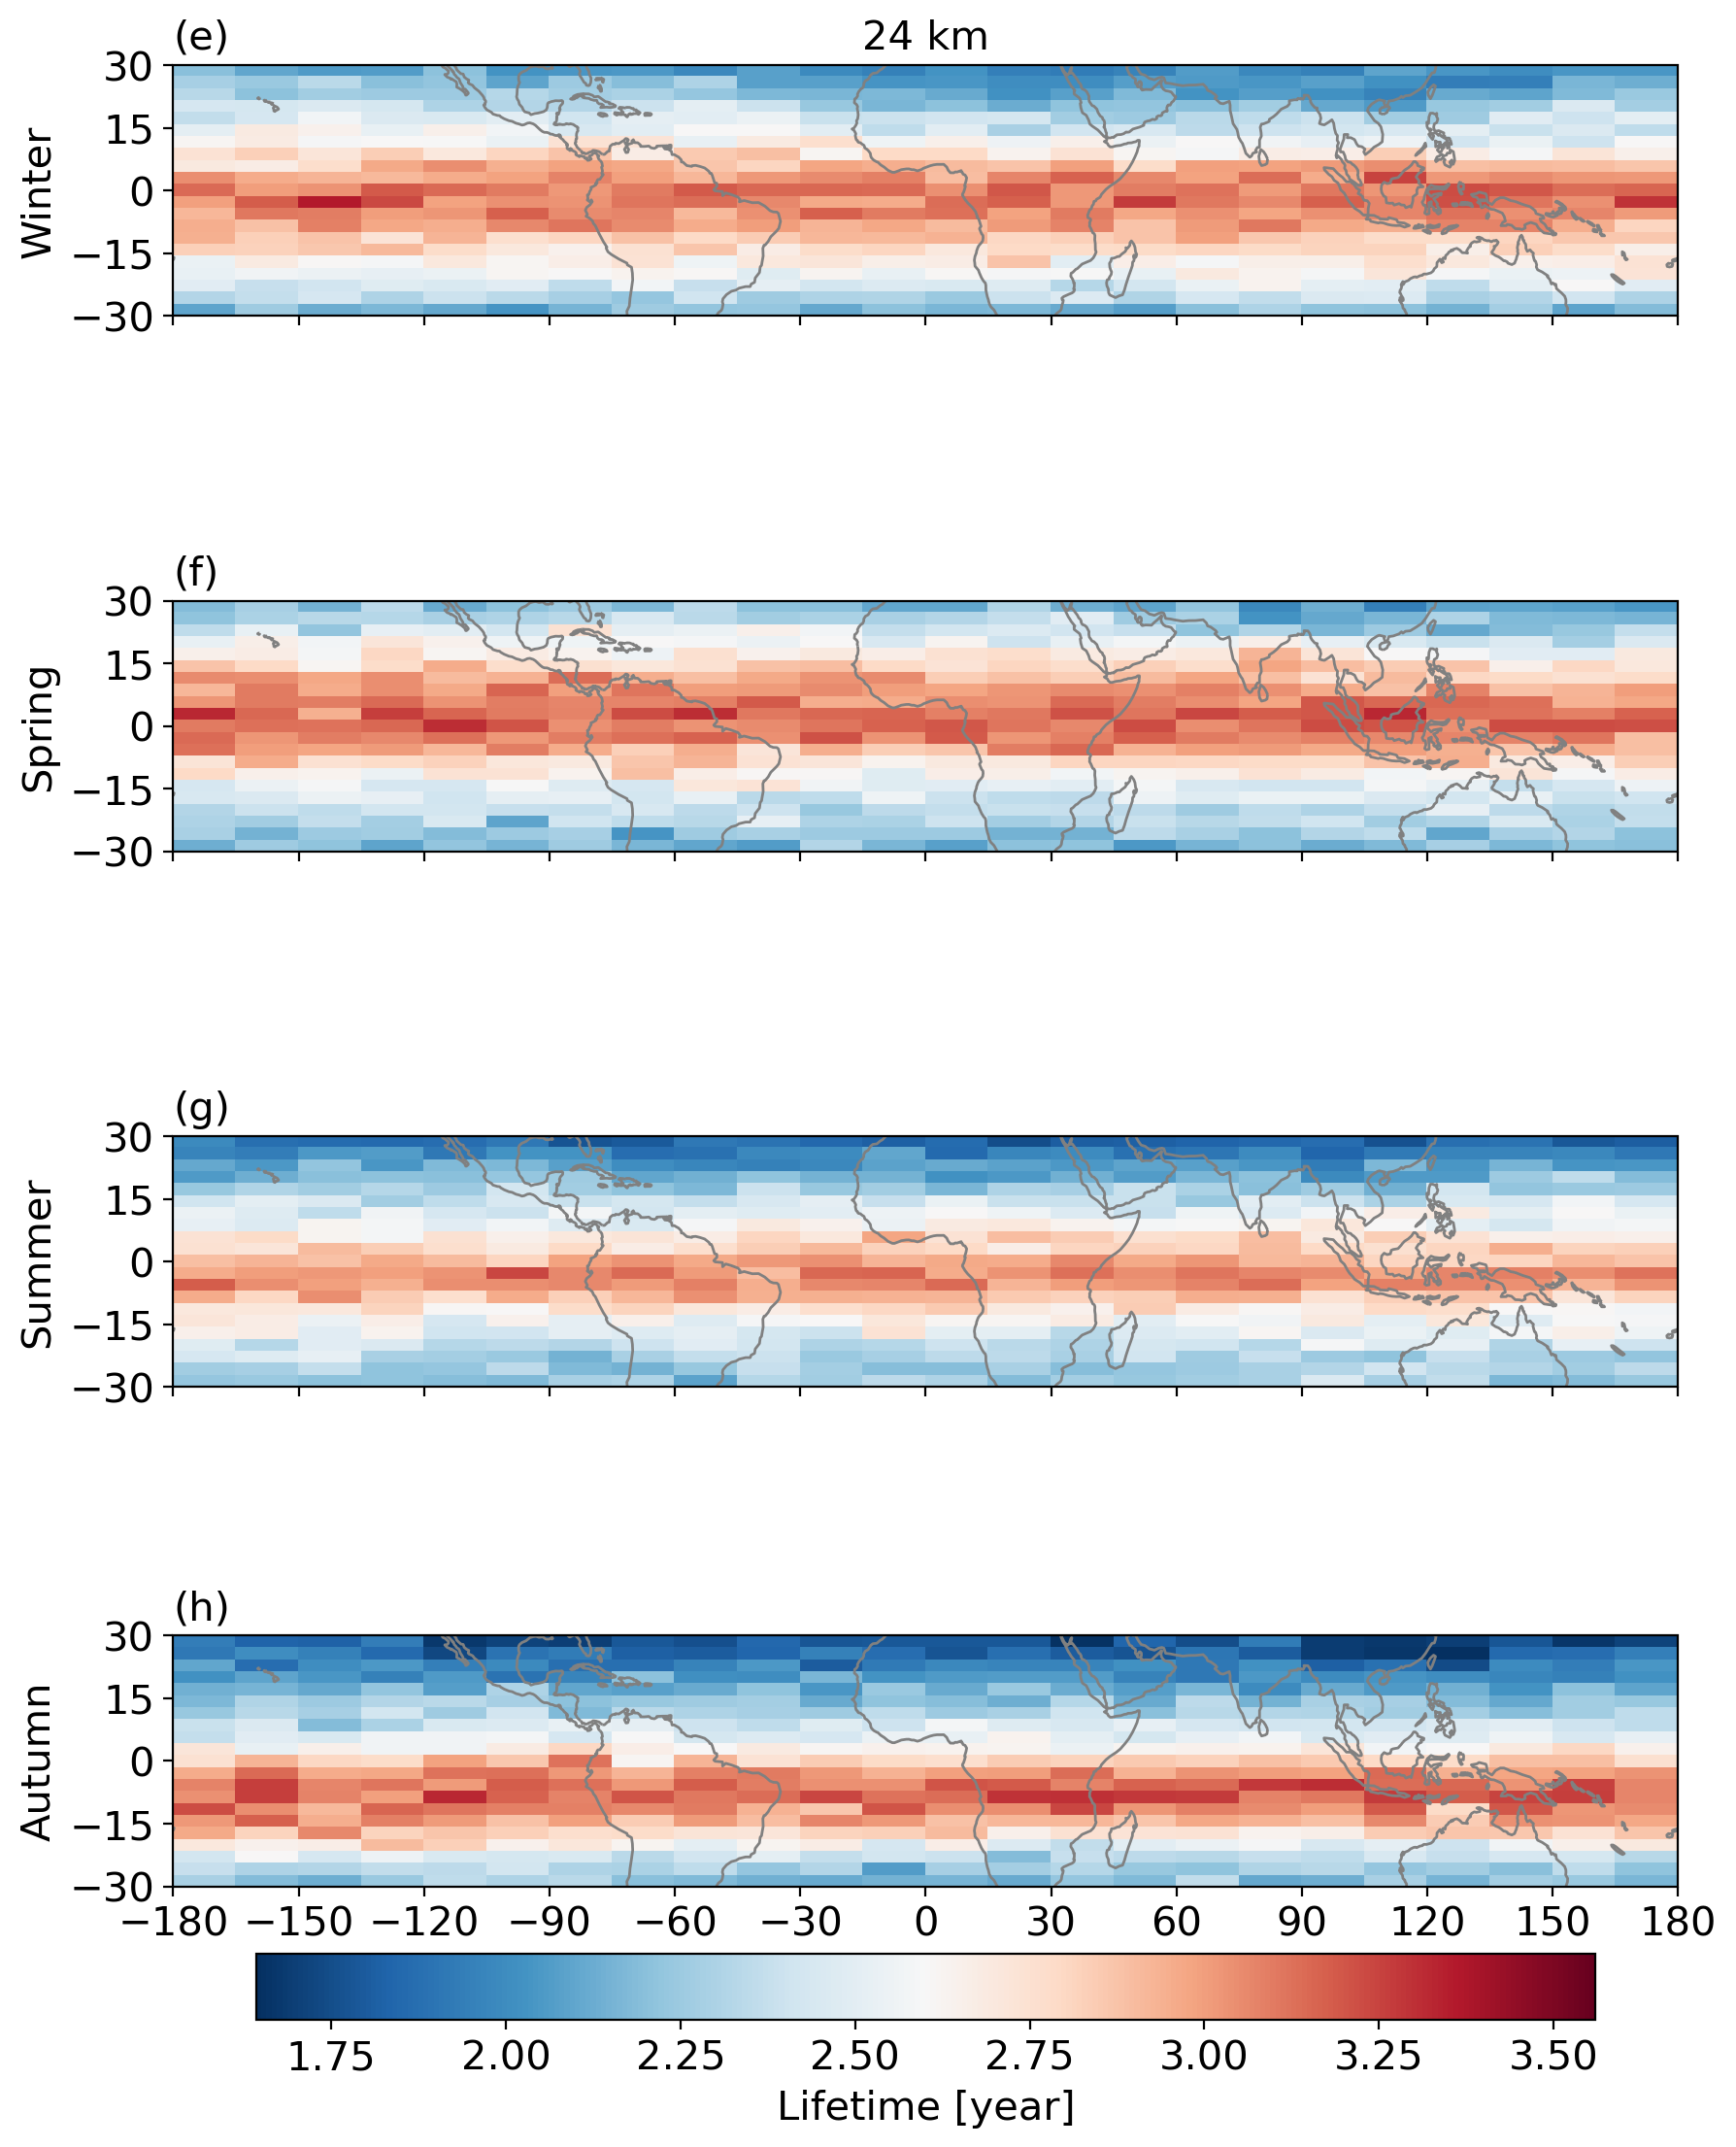

In [36]:

print(Height[iz])

fig = plt.figure(figsize=(10,14), dpi=200)
projection = crs.PlateCarree()
    
    
extent = [-180 , 180 , -30 , 30]

###
ax1 = fig.add_subplot(4,1,1, projection=projection)

ax1.set_global()
ax1.set_extent(extent, crs=projection) ## Important
ax1.add_feature(cfeature.COASTLINE, edgecolor="gray")

ax1_pixel = plt.imshow(lifetime_season_mean_new2[iz,:,:,0]/365.25, vmin=Day_min, vmax=Day_max,\
           extent = extent, cmap='RdBu_r', interpolation='nearest')

### add box to mark the high/low lifetime center
if iz==1:
    ax1.plot([60, 105], [-10, -10], 'r-')
    ax1.plot([60, 105], [10, 10], 'r-')
    ax1.plot([60, 60], [-10, 10], 'r-')
    ax1.plot([105, 105], [-10, 10], 'r-')

    ax1.plot([-75, -120],  [-10, -10], 'k-')
    ax1.plot([-75, -120],  [10, 10],   'k-')
    ax1.plot([-75, -75],   [-10, 10],  'k-')
    ax1.plot([-120, -120], [-10, 10],  'k-')
    
# cb1 = plt.colorbar(ax1_pixel, ax=ax1)
# cb1.set_label('[year]', fontsize=12);

ax1.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax1.set_yticks(np.linspace(-30, 30, 5), crs=projection)
ax1.set_xticklabels([])
ax1.tick_params(axis='y', labelsize=15 )

ax1.set_title(f"{Height[iz]} km", fontsize=15)
ax1.set_ylabel("Winter", fontsize=15)
ax1.set_title("(e)", loc='left', fontsize=15)


# ax1.yaxis.set_major_formatter(EngFormatter(unit=u"°"))

###
ax2 = fig.add_subplot(4,1,2, projection=projection)

ax2.set_global()
ax2.set_extent(extent, crs=projection) ## Important
ax2.add_feature(cfeature.COASTLINE, edgecolor="gray")

ax2_pixel = plt.imshow(lifetime_season_mean_new2[iz,:,:,1]/365.25, vmin=Day_min, vmax=Day_max,\
           extent = extent, cmap='RdBu_r', interpolation='nearest')

# cb2 = plt.colorbar(ax2_pixel, ax=ax2)
# cb2.set_label('[years]', fontsize=12);

ax2.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax2.set_yticks(np.linspace(-30, 30, 5), crs=projection)
ax2.set_xticklabels([])
ax2.tick_params(axis='y', labelsize=15 )

ax2.set_ylabel("Spring", fontsize=15)
ax2.set_title("(f)", loc='left', fontsize=15)

###
ax3 = fig.add_subplot(4,1,3, projection=projection)

ax3.set_global()
ax3.set_extent(extent, crs=projection) ## Important
ax3.add_feature(cfeature.COASTLINE, edgecolor="gray")

ax3_pixel = plt.imshow(lifetime_season_mean_new2[iz,:,:,2]/365.25, vmin=Day_min, vmax=Day_max,\
           extent = extent, cmap='RdBu_r', interpolation='nearest')

# cb3 = plt.colorbar(ax3_pixel, ax=ax3)
# cb3.set_label('[year]', fontsize=12);

ax3.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax3.set_yticks(np.linspace(-30, 30, 5), crs=projection)
ax3.set_xticklabels([])
ax3.tick_params(axis='y', labelsize=15 )

ax3.set_ylabel("Summer", fontsize=15)
ax3.set_title("(g)", loc='left', fontsize=15)

###
ax4 = fig.add_subplot(4,1,4, projection=projection)

ax4.set_global()
ax4.set_extent(extent, crs=projection) ## Important
ax4.add_feature(cfeature.COASTLINE, edgecolor="gray")

ax4_pixel = plt.imshow(lifetime_season_mean_new2[iz,:,:,3]/365.25, vmin=Day_min, vmax=Day_max,\
           extent = extent, cmap='RdBu_r', interpolation='nearest')

cb4 = plt.colorbar(ax4_pixel, ax=ax4, orientation="horizontal")
cb4.set_label('Lifetime [year]', fontsize=15);
cb4.ax.tick_params(labelsize=15)

ax4.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax4.set_yticks(np.linspace(-30, 30, 5), crs=projection)

ax4.tick_params(axis='x', labelsize=15 )
ax4.tick_params(axis='y', labelsize=15 )

ax4.set_ylabel("Autumn", fontsize=15)
ax4.set_title("(h)", loc='left', fontsize=15)

# fig.colorbar(ax=ax4, orientation='horizontal')
# plt.tight_layout()
# plt.colorbar()
# plt.set_label('[year]', fontsize=12)

plt.show()

In [19]:
from scipy import interpolate
x = LON_1d
y = LAT_1d
z = lifetime_season_mean_new2[iz,:,:,0]/365.25
f = interpolate.interp2d(x, y, z, kind='cubic')

x1 = LON_1d
y1 = np.arange(-16,17,4)
z1 = f(x1, y1)

In [20]:
# lifetime_season_mean_new = np.zeros((Nz, Ny, Nx, N_season))

with open('/n/home12/hongwei/Plot_Mid_Lat_Injection/Figures/Tropical_lifetime.txt', 'w') as f:
    for iz in range(Nz):
        for iy in range(Ny):
            for ix in range(Nx):
                for iseason in range(N_season):
                
                    f.write(  str( lifetime_season_mean_new[iz,iy,ix,iseason] )  )
                    f.write('\n')
                        
    f.close()
    
###
with open('/n/home12/hongwei/Plot_Mid_Lat_Injection/Figures/Tropical_Lat.txt', 'w') as f:
    for iy in range(Ny):
        
        f.write(  str( LAT_1d[iy] )  )
        f.write('\n')
                        
    f.close()
    
    
###
with open('/n/home12/hongwei/Plot_Mid_Lat_Injection/Figures/Tropical_Lon.txt', 'w') as f:
    for ix in range(Nx):
        
        f.write(  str( LON_1d[ix] )  )
        f.write('\n')
                        
    f.close()